# 繪製空間內插圖

從資料庫抓取資料，並在python中執行空間內插，必且繪製出GIS圖

In [10]:
import pymysql
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import Rbf
import mpl_toolkits.basemap 

%matplotlib inline
plt.rc('figure', figsize=(12, 10))

In [8]:
conn = pymysql.connect(host='localhost', port=3306, user='root', passwd='husky', db='ncu',charset='UTF8')


Psite = [['C0R380', '枋寮' ,207739.85,2474518.08] ,['C1R090', '里港' ,198323.53,2522247.83]
        ,['C1V350', '溪埔' ,193180.66,2515441.62] ,['C1R110', '古夏' ,213569.44,2518870.88]
        ,['C0V310', '美濃' ,200670.19,2533151.16] ,['C1V340', '大津' ,213679.28,2531960.44]
        ,['C1R260', '春日' ,211722.18,2474611.37] ,['C1R240', '來義' ,211436.57,2491990.24]
        ,['C1R250', '力里' ,211832.9,2481006.25] ,['C1R170', '屏東' ,198006.81,2506752.98]
        ,['C1R160', '新圍' ,201806.82,2515520.39] ,['C1R200', '龍泉' ,209102.27,2507475.33]
        ,['C1R190', '赤山' ,210343.69,2499193.41] ,['C0R150', '三地門' ,213011.27,2512203.76]
        ,['C0R220', '潮州' ,202683.8,2492795.87] ,['C1V320', '吉東' ,204552.88,2526764.67]
        ,['C1V330', '旗山' ,198110.53,2530826.54] ,['C1R210', '麟洛' ,203934.2,2506408.85]
        ,['C1R230', '南州' ,200247.06,2488180.58] ,['C1V180', '大寮' ,191602.11,2501210.87]
        ,['C0R590', '里港' ,198323.53,2522247.83] ,['C0V350', '溪埔' ,193180.66,2515441.62]
        ,['C0R260', '春日' ,211722.18,2474611.37] ,['C0R240', '來義' ,211436.57,2491990.24]
        ,['C0R170', '屏東' ,198006.81,2506752.98] ,['C0R160', '新圍' ,201806.82,2515520.39]
        ,['C1R201', '龍泉' ,209102.27,2507475.33] ,['C0R190', '赤山' ,210343.69,2499193.41]
        ,['C1V570', '吉東' ,204552.88,2526764.67] ,['C0V740', '旗山' ,198110.53,2530826.54]
        ,['C0R570', '麟洛' ,203934.2,2506408.85] ,['C0R580', '南州' ,200247.06,2488180.58]
        ,['C0V730', '大寮' ,191602.11,2501210.87]]


for site in Psite:
    with conn.cursor() as cursor:
        #print("select sum(value) from precipitation where `site` = {} and `date` >= '2012-07-01 00:00:00' and `date` <= '2012-07-31 23:00:00' group by site".format(site[0]))
        cursor.execute("select sum(value) from precipitation where `site` = '{}' and `date` >= '2012-07-01 00:00:00' and `date` <= '2012-07-31 23:00:00' group by site".format(site[0]))
  
    for i in cursor:
        site.append(i[0])


sump = [site for site in Psite if len(site) > 4]
print(sump)

[['C0R380', '枋寮', 207739.85, 2474518.08, 81.0], ['C1R090', '里港', 198323.53, 2522247.83, 153.5], ['C1V350', '溪埔', 193180.66, 2515441.62, 144.5], ['C1R110', '古夏', 213569.44, 2518870.88, 230.5], ['C0V310', '美濃', 200670.19, 2533151.16, 257.0], ['C1V340', '大津', 213679.28, 2531960.44, 227.5], ['C1R260', '春日', 211722.18, 2474611.37, 102.5], ['C1R240', '來義', 211436.57, 2491990.24, 127.0], ['C1R250', '力里', 211832.9, 2481006.25, 67.0], ['C1R170', '屏東', 198006.81, 2506752.98, 168.0], ['C1R160', '新圍', 201806.82, 2515520.39, 190.0], ['C1R200', '龍泉', 209102.27, 2507475.33, 110.5], ['C1R190', '赤山', 210343.69, 2499193.41, 166.0], ['C0R150', '三地門', 213011.27, 2512203.76, 103.5], ['C0R220', '潮州', 202683.8, 2492795.87, 195.0], ['C1R210', '麟洛', 203934.2, 2506408.85, 168.5]]


```sql
select sum(value) from precipitation 
    where `site` = 'C0R150' and 
            `date` >= '2012-07-01 00:00:00' and 
            `date` <= '2012-07-31 23:00:00'
    group by site
```

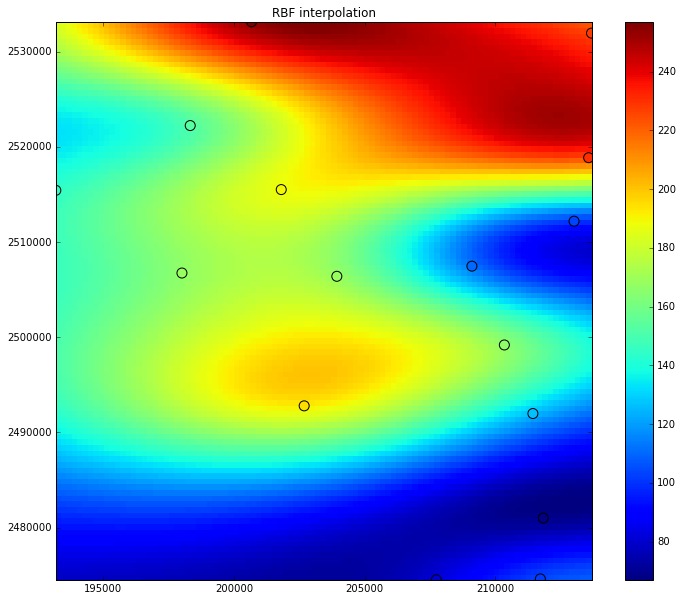

In [19]:
x = []
y = []
values = []

for p in sump:
    x.append(p[2])
    y.append(p[3])
    values.append(p[4])

#Creating the output grid (100x100, in the example)
ti = np.linspace(min(x), max(x), 100)
tj = np.linspace(min(y), max(y), 100)
XI, YI = np.meshgrid(ti, tj)

#Creating the interpolation function and populating the output matrix value
rbf = Rbf(x, y, values, function='inverse')
ZI = rbf(XI, YI)

# Plotting the result
#n = plt.normalize(0.0, 100.0)
plt.subplot(1, 1, 1)
plt.pcolor(XI, YI, ZI)
plt.scatter(x, y, 100, values)
plt.title('RBF interpolation')
plt.xlim(min(x), max(x))
plt.ylim(min(y), max(y))
plt.colorbar();
